In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      featurewise_center=True,
      featurewise_std_normalization=True,
      zca_whitening=True,
      rescale=1./255,
      fill_mode='nearest')

train_batchsize = 100
 
train_generator = train_datagen.flow_from_directory(
         'data/train',
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(
      featurewise_center=True,
      featurewise_std_normalization=True,
      zca_whitening=True,
      rescale=1./255)

val_batchsize = 50
 
validation_generator = validation_datagen.flow_from_directory(
         'data/valid',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

test_datagen = ImageDataGenerator(
      featurewise_center=True,
      featurewise_std_normalization=True,
      zca_whitening=True,
      rescale=1./255)

test_batchsize = 50
 
test_generator = test_datagen.flow_from_directory(
         'data/test',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)


/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:763: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 300 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [2]:
from matplotlib import pyplot
for X_batch, y_batch in train_generator:
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i], cmap=pyplot.get_cmap('gray'));
    # show the plot
    pyplot.show();
    break

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:978: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


<Figure size 640x480 with 9 Axes>

In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

In [4]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# add a fully-connected layer and a logistic layer 
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first train only the top layers (which were randomly initialized)
# freeze all convolutional ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# compile the model after setting layers to non-trainable
model.compile(optimizer='adam', loss='binary_crossentropy')

# train the model on the new data for a few epochs
model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=5,
      verbose=1)

Epoch 1/5


/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:978: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


3/3 [==============================] - 57s 19s/step - loss: 1.9557
Epoch 2/5
3/3 [==============================] - 56s 19s/step - loss: 0.9204
Epoch 3/5
3/3 [==============================] - 61s 20s/step - loss: 0.7293
Epoch 4/5
3/3 [==============================] - 58s 19s/step - loss: 0.6255
Epoch 5/5
3/3 [==============================] - 60s 20s/step - loss: 0.5052


In [6]:
# start fine-tuning convolutional layers from ResNet50
# will freeze the bottom N layers and train the remaining top layers
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# freeze the first 86 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [7]:
# recompile the model for these modifications to take effect
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['acc'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/10


/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:978: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


3/3 [==============================] - 89s 30s/step - loss: 0.5061 - acc: 0.7533 - val_loss: 0.2856 - val_acc: 0.8600
Epoch 2/10
3/3 [==============================] - 85s 28s/step - loss: 0.0569 - acc: 0.9850 - val_loss: 0.8849 - val_acc: 0.6800
Epoch 3/10
3/3 [==============================] - 78s 26s/step - loss: 0.0249 - acc: 0.9967 - val_loss: 1.2939 - val_acc: 0.6600
Epoch 4/10
3/3 [==============================] - 78s 26s/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.1039 - val_acc: 0.7000
Epoch 5/10
3/3 [==============================] - 77s 26s/step - loss: 0.0330 - acc: 0.9967 - val_loss: 1.2744 - val_acc: 0.7300
Epoch 6/10
3/3 [==============================] - 78s 26s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.3751 - val_acc: 0.7600
Epoch 7/10
3/3 [==============================] - 77s 26s/step - loss: 0.0042 - acc: 0.9967 - val_loss: 1.3559 - val_acc: 0.7700
Epoch 8/10
3/3 [==============================] - 78s 26s/step - loss: 9.3812e-04 - acc: 1.0000 - val_loss: 

In [8]:
# Save the model
model.save('inception_v3_date_flow_dir.h5')

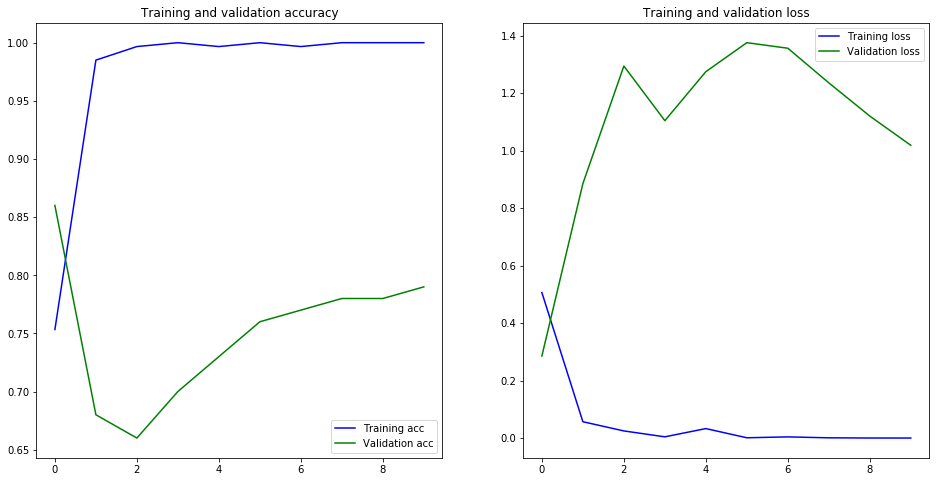

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
fig, axes = plt.subplots(1,2,figsize=(16,8))

axes[0].plot(acc, 'b', label='Training acc')
axes[0].plot(val_acc, 'g', label='Validation acc')
axes[0].set_title('Training and validation accuracy')
axes[0].legend()

axes[1].plot(loss, 'b', label='Training loss')
axes[1].plot(val_loss, 'g', label='Validation loss')
axes[1].set_title('Training and validation loss')
axes[1].legend()

plt.show()

In [10]:
score, acc = model.evaluate_generator(validation_generator)
print('Test score:', score)
print('Test accuracy:', acc)

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:978: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Test score: 1.0182684659957886
Test accuracy: 0.7900000214576721


In [11]:
predict = model.predict_generator(test_generator)

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:978: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [12]:
predict

array([[1.00000000e+00, 2.65168350e-08],
       [9.95354295e-01, 1.87908893e-03],
       [1.00000000e+00, 7.34936778e-10],
       [1.00000000e+00, 1.69810986e-12],
       [1.00000000e+00, 8.64993569e-13],
       [6.06115274e-02, 9.19933736e-01],
       [9.99999762e-01, 1.57490689e-07],
       [2.87751434e-04, 9.99868512e-01],
       [8.11758116e-02, 8.98819804e-01],
       [1.68108687e-01, 7.42591083e-01],
       [5.41757524e-01, 3.30943555e-01],
       [1.00000000e+00, 2.95697911e-10],
       [1.00000000e+00, 2.01661621e-09],
       [9.99693274e-01, 1.62896307e-04],
       [1.19482398e-01, 8.25149119e-01],
       [3.44015146e-03, 9.96997952e-01],
       [9.97320473e-01, 1.20399974e-03],
       [1.00000000e+00, 3.91980476e-10],
       [7.45999021e-03, 9.93413150e-01],
       [9.51438844e-01, 2.76183859e-02],
       [9.71873760e-01, 1.60917658e-02],
       [3.71788628e-02, 9.51645195e-01],
       [1.00000000e+00, 6.15939881e-20],
       [1.00000000e+00, 2.67049815e-12],
       [9.999743